<a href="https://colab.research.google.com/github/Viniciuseel/topicos_de_bigdata_python/blob/main/trabalho_topicos_de_bigdata_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# Carregar os dados
data = pd.read_excel("/content/BigDataPy_TstNotOfc.xlsx")
data

,Cod_ID,UDH_Atlas,NOME_UDH,CODMUN6,CODUF,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_tudo,T_FLMED_tudo,T_FLBAS_tudo,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1230440001001,1230440001001,Alagadiço I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
1,1230440001002,1230440001002,Jacareganga I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
2,1230440001003,1230440001003,Farias Brito I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
3,1230440001005,1230440001005,Morro do Ouro ( Cercado do Zé Padre e entorno ),230440,23,62300,2010,72.97,2.15,18.5,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
4,1230440001006,1230440001006,Vila Velha I,230440,23,62300,2010,69.92,2.60,26.7,...,94.00,46.40,91.42,83.39,0.536,0.625,0.641,0.594,0.749,0.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1230440007258,1230440007258,Bairro do Centro ( Entorno da Praça José de Al...,230440,23,62300,2010,79.38,1.28,9.4,...,96.93,63.60,95.94,94.84,0.821,0.824,0.850,0.823,0.906,0.825
243,1230440007259,1230440007259,Bairro do Centro ( Comunidade Baixa Pau e ento...,230440,23,62300,2010,72.97,2.15,18.5,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
244,1230440007262,1230440007262,Bairro do Centro : Área Oeste,230440,23,62300,2010,76.90,1.35,12.6,...,97.72,65.33,93.93,81.69,0.750,0.780,0.788,0.770,0.865,0.734
245,1230440007263,1230440007263,Bairro do Centro ( Rua Tenente Benévolo e adja...,230440,23,62300,2010,78.28,1.32,10.7,...,95.47,62.01,92.33,89.11,0.750,0.765,0.797,0.760,0.888,0.751


In [ ]:
valores_ausentes = data.isna().sum()
colunas_com_ausentes = valores_ausentes[valores_ausentes > 0]
print(colunas_com_ausentes)

PIND         1
PINDCRI      1
PMPOBCRI     1
RIND         1
T_DES1014    4
dtype: int64


In [ ]:
# Tratamento de valores ausentes
#imputer = SimpleImputer(strategy='mean')
#colunas_com_ausentes = ['PIND', 'PINDCRI', 'PMPOBCRI', 'RIND', 'T_DES1014']
#data[colunas_com_ausentes] = imputer.fit_transform(data[colunas_com_ausentes])
#data = pd.DataFrame(data, columns=data.columns)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#print(data)

In [ ]:
from sklearn.impute import SimpleImputer

# Inicializando o imputer com estratégia de imputação como 'mean' (média)
imputer = SimpleImputer(strategy='mean')

# Aplicando a imputação apenas nas colunas com valores ausentes
colunas_com_ausentes = ['PIND', 'PINDCRI', 'PMPOBCRI', 'RIND','T_DES1014']
data_imputado = pd.DataFrame(imputer.fit_transform(data[colunas_com_ausentes]), columns=colunas_com_ausentes)


# Adicionando as colunas imputadas de volta ao conjunto de dados original
data[colunas_com_ausentes] = data_imputado
data


,Cod_ID,UDH_Atlas,NOME_UDH,CODMUN6,CODUF,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_tudo,T_FLMED_tudo,T_FLBAS_tudo,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1230440001001,1230440001001,Alagadiço I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
1,1230440001002,1230440001002,Jacareganga I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
2,1230440001003,1230440001003,Farias Brito I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
3,1230440001005,1230440001005,Morro do Ouro ( Cercado do Zé Padre e entorno ),230440,23,62300,2010,72.97,2.15,18.5,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
4,1230440001006,1230440001006,Vila Velha I,230440,23,62300,2010,69.92,2.60,26.7,...,94.00,46.40,91.42,83.39,0.536,0.625,0.641,0.594,0.749,0.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1230440007258,1230440007258,Bairro do Centro ( Entorno da Praça José de Al...,230440,23,62300,2010,79.38,1.28,9.4,...,96.93,63.60,95.94,94.84,0.821,0.824,0.850,0.823,0.906,0.825
243,1230440007259,1230440007259,Bairro do Centro ( Comunidade Baixa Pau e ento...,230440,23,62300,2010,72.97,2.15,18.5,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
244,1230440007262,1230440007262,Bairro do Centro : Área Oeste,230440,23,62300,2010,76.90,1.35,12.6,...,97.72,65.33,93.93,81.69,0.750,0.780,0.788,0.770,0.865,0.734
245,1230440007263,1230440007263,Bairro do Centro ( Rua Tenente Benévolo e adja...,230440,23,62300,2010,78.28,1.32,10.7,...,95.47,62.01,92.33,89.11,0.750,0.765,0.797,0.760,0.888,0.751


In [ ]:

# Codificação com Label Encoding
label_encoder = LabelEncoder()
data['NOME_UDH_encoded'] = label_encoder.fit_transform(data['NOME_UDH'])
print(data)


            Cod_ID      UDH_Atlas  \
0    1230440001001  1230440001001   
1    1230440001002  1230440001002   
2    1230440001003  1230440001003   
3    1230440001005  1230440001005   
4    1230440001006  1230440001006   
..             ...            ...   
242  1230440007258  1230440007258   
243  1230440007259  1230440007259   
244  1230440007262  1230440007262   
245  1230440007263  1230440007263   
246  1230440007264  1230440007264   

                                              NOME_UDH  CODMUN6  CODUF  CODRM  \
0                                          Alagadiço I   230440     23  62300   
1                                        Jacareganga I   230440     23  62300   
2                                       Farias Brito I   230440     23  62300   
3      Morro do Ouro ( Cercado do Zé Padre e entorno )   230440     23  62300   
4                                         Vila Velha I   230440     23  62300   
..                                                 ...      ...    ..

In [ ]:

# Remover coluna original 'NOME_UDH'
data.drop(columns=['NOME_UDH','CODMUN6','CODUF','ANO','CODRM'], inplace=True)

In [ ]:
data = pd.DataFrame(data)
data

In [ ]:
# Padronização dos dados
scaler = StandardScaler()
data_padronizado = scaler.fit_transform(data)
print(data_padronizado)


[[-1.53173332 -1.53173332  1.24463318 ...  1.24390903  1.19877074
  -1.64090369]
 [-1.53120717 -1.53120717  1.24463318 ...  1.24390903  1.19877074
  -0.09817372]
 [-1.53068102 -1.53068102  1.24463318 ...  1.24390903  1.19877074
  -0.40671972]
 ...
 [ 1.76251464  1.76251464  0.39806829 ...  0.39694263  0.1938305
  -1.36040733]
 [ 1.76304079  1.76304079  0.78748814 ...  0.78654717  0.35969442
  -1.37443215]
 [ 1.76356695  1.76356695  0.78748814 ...  0.78654717  0.35969442
  -1.34638251]]


In [ ]:
#data_padronizado = pd.DataFrame(data_padronizado)
#data_padronizado

In [ ]:
# Aplicação do PCA
num_componentes = 2
pca = PCA(n_components=num_componentes)
data_pca = pca.fit_transform(data_padronizado)
print(data_pca)

[[-1.12927209e+01  5.67719355e+00]
 [-1.31951592e+01  3.45839639e-01]
 [-1.36034251e+01 -4.53488946e-01]
 [ 5.48636728e+00 -6.69752634e+00]
 [ 1.55973442e+01  6.46435287e+00]
 [ 2.25984380e+01  2.29534566e+01]
 [ 6.31941604e+00 -6.25458601e+00]
 [ 1.32629481e+01  1.49993247e+00]
 [ 8.99678641e+00 -3.00988256e+00]
 [ 9.21706788e+00  1.46892518e+01]
 [ 6.09253730e+00 -9.37105080e+00]
 [ 9.32916648e+00  1.11310235e+01]
 [ 5.90075839e+00 -9.23795552e+00]
 [-4.81796947e+00 -1.80763707e+00]
 [ 7.08955333e+00  1.18314127e+01]
 [-3.66837251e+00  2.41697487e-01]
 [ 4.57425555e-02 -6.21699495e+00]
 [-1.10016720e+01 -1.70205534e+00]
 [-1.12321015e+01 -2.58477829e+00]
 [-7.82345640e+00 -2.87701615e+00]
 [-1.05221203e+01 -1.39958436e+00]
 [-7.66027482e-01 -6.46046752e+00]
 [-1.85949719e+00 -3.54511113e+00]
 [-9.63482031e+00  1.89948098e+00]
 [-3.64508950e+00  6.06841709e-01]
 [ 1.19566138e+00 -7.15703965e+00]
 [ 2.37407702e+00  7.36052263e+00]
 [ 1.34216684e+01  1.32333864e+01]
 [ 5.53409151e+00 -6

In [ ]:
data.corr()

In [ ]:
# Aplicação do método do cotovelo
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)


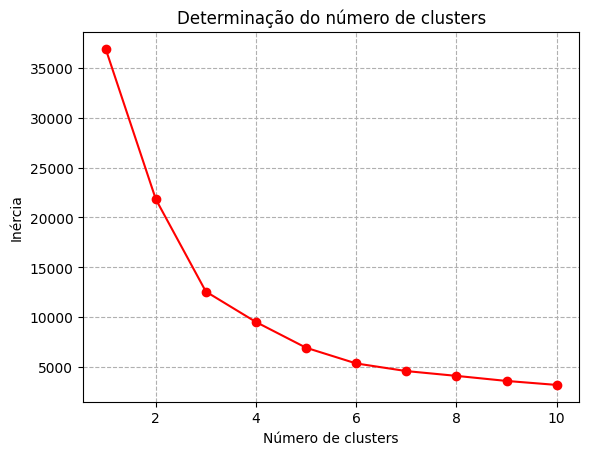

In [ ]:
# Plotar o método do cotovelo com linhas tracejadas
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='r')
plt.grid(True, linestyle='--', alpha=1.0)
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Determinação do número de clusters')


plt.show()



In [ ]:

# Ajustar o KMeans com o número de clus7626ters escolhido
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:

# Adicionar rótulos de cluster aos dados originais
data['Cluster'] = kmeans.labels_

In [ ]:
# Calcular e imprimir o silhouette score
silhouette = silhouette_score(data_pca, kmeans.labels_)
print("Silhouette Score:", silhouette)
7626

Silhouette Score: 0.4762469626888871


7626

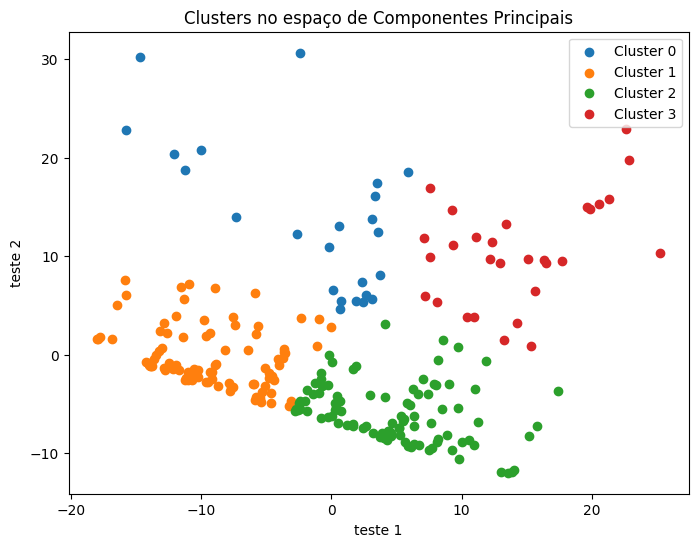

In [ ]:
# Visualizar clusters no espaço de PCA
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(data_pca[data['Cluster'] == cluster][:, 0], data_pca[data['Cluster'] == cluster][:, 1], label=f'Cluster {cluster}')
plt.xlabel('teste 1')
plt.ylabel('teste 2')
plt.title('Clusters no espaço de Componentes Principais')
plt.legend()
plt.show()
